In [35]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np

## Assignment 4

Using data from this FiveThirtyEight post, write code to calculate the correlation of the responses from the poll.
Respond to the story in your PR. Is this a good example of data journalism? Why or why not?

In [2]:
df = pd.read_excel("data/DATA_FOX.xlsx")

In [3]:
df.columns = ["NaN", "Demography", "Approve_obama", "Disapprove_obama", "(Don't know)_obama", "Favor", "Oppose","(Don't know)_iran", "NaN","NaN", "NaN","NaN","NaN"]

In [4]:
del df['NaN']

In [19]:
df1 = df.drop(df.index[[0,10,11,12,13,14,15,16,17,18,19,20,21,22]])

In [6]:
df.columns

Index(['Demography', 'Approve_obama', 'Disapprove_obama', '(Don't know)_obama',
       'Favor', 'Oppose', '(Don't know)_iran'],
      dtype='object')

In [13]:
df2 = df[["Demography", "Approve_obama", "Favor"]]

In [14]:
df2.drop(df.index[[0,10,11,12,13,14,15,16,17,18,19,20,21,22]])

,Demography,Approve_obama,Favor
1,Dem,0.78,0.6
2,Rep,0.1,0.34
3,Ind,0.37,0.44
4,Men,0.41,0.46
5,Women,0.47,0.47
6,White,0.35,0.45
7,Black,0.85,0.54
8,Degree,0.47,0.5
9,no Degree,0.43,0.45


In [48]:
lm = smf.ols(formula="Favor~Approve_obama",data=df2[0:2]).fit()

In [49]:
lm.params

,0,1
Intercept,1.0,-1.103220e-16
Approve_obama[T.Approve_obama],-1.0,1.000000e+00


In [56]:
Intercept, slope = lm.params

(0, 0.8)

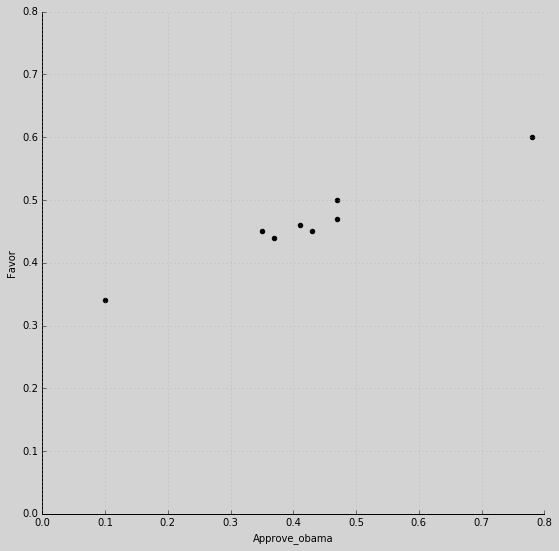

In [70]:
fig, ax = plt.subplots(figsize=(9,9))
fig.set_facecolor('lightgray')
ax.set_axis_bgcolor('lightgray')


ax.grid(linestyle='-')
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)

plt.tick_params(
    which='major', # both major and minor ticks are affected
    top='off',   # ticks along the top edge are off
    left='on', # ticks along the right edge are off
    right='off', # ticks along the right edge are off
    bottom='on', # ticks along the bottom edge are on
    labelright='off',
    labelleft='on',
    labeltop='off', # top label is on
    labelbottom='on')  # bottom label is on

df1.plot(kind='scatter', x="Approve_obama", y="Favor", color='Black', ax=ax, marker='o')
#Cant get the line!!
#ax.plot(df["Approve_obama"],slope*df["Favor"]+Intercept,"-",color="red")

ax.xaxis.grid(color='darkgrey', linestyle=':', linewidth=0.5)
ax.yaxis.grid(color='darkgrey', linestyle=':', linewidth=0.5)
    
ax.set_ylim((0, 0.8))
ax.set_xlim((0, 0.8))